# **Deep Learning Model using CNN for Dogs vs Cats**

# **Imports**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 142MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Creating a Fully Connected Convolutional Neural Network**

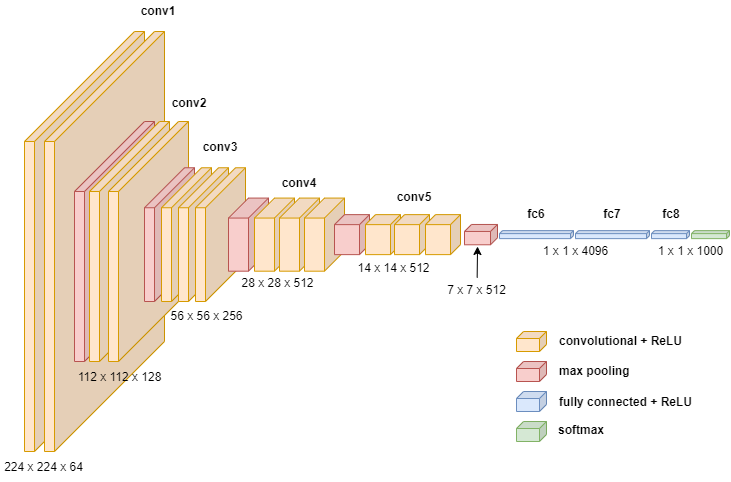

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 106ms/step - loss: 1.5440 - accuracy: 0.5723 - val_loss: 0.7097 - val_accuracy: 0.5990
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6098 - accuracy: 0.6704 - val_loss: 0.5677 - val_accuracy: 0.6964
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5338 - accuracy: 0.7305 - val_loss: 0.5367 - val_accuracy: 0.7228
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4530 - accuracy: 0.7801 - val_loss: 0.4737 - val_accuracy: 0.7798
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4135 - accuracy: 0.8035 - val_loss: 0.4651 - val_accuracy: 0.7862
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3632 - accuracy: 0.8288 - val_loss: 0.5028 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3130 - accuracy: 0.8590 - val_loss: 0.6216 - val_ac

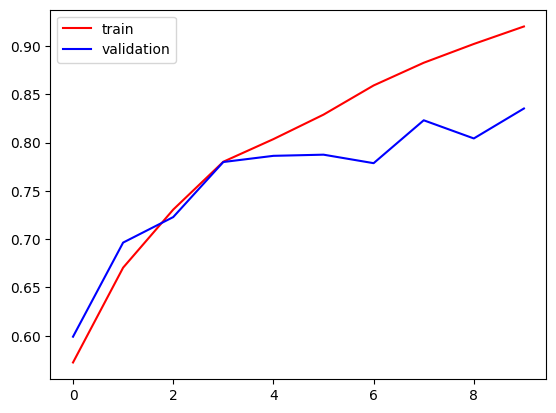

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

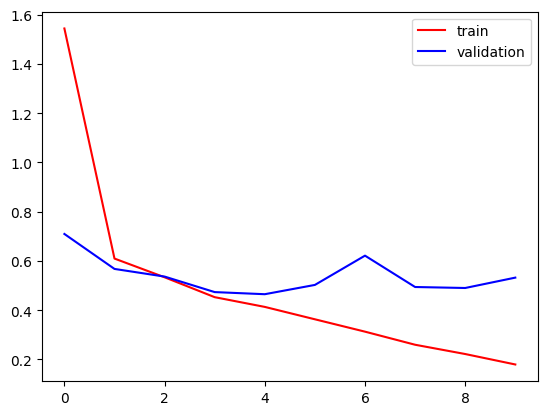

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Testing the model on new data**

In [14]:
import cv2

In [41]:
test_img = cv2.imread('/content/cat.jpg')

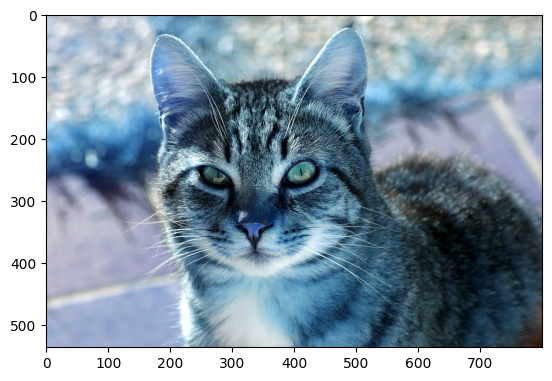

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(536, 800, 3)

In [44]:
test_img = cv2.resize(test_img, (256,256))

In [45]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.03625225e-05]], dtype=float32)

In [47]:
test_img2 = cv2.imread('/content/dog.jpg')

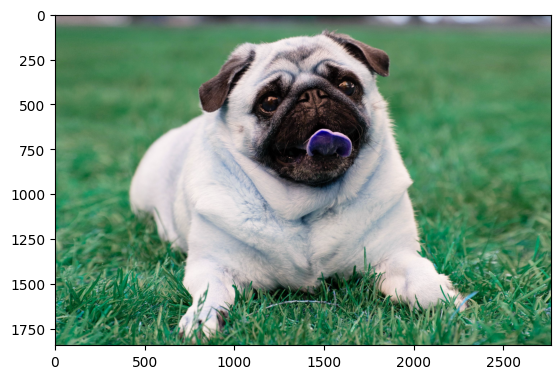

In [48]:
plt.imshow(test_img2)

In [49]:
test_img2.shape

(1843, 2765, 3)

In [50]:
test_img2 = cv2.resize(test_img2, (256,256))

In [51]:
test_input2 = test_img2.reshape((1,256,256,3))

In [52]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)